In [37]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

Task 1

In [3]:
# Rosenbrock function
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Gradient of Rosenbrock
def grad_rosenbrock(x, y):
    dx = -2*(1 - x) - 400*x*(y - x**2)
    dy = 200*(y - x**2)
    return np.array([dx, dy])


# sin(1/x) function
def sin_inverse(x):
    if abs(x) < 1e-6:
        return 0.0
    return np.sin(1/x)

# Gradient of sin(1/x)
def grad_sin_inverse(x):
    if abs(x) < 1e-6:
        return 0.0
    return -np.cos(1/x) / (x**2)


In [4]:
def gradient_descent(func, grad, init, lr, max_iter=5000, tol=1e-6):
    x = np.array(init, dtype=float)
    history = []
    start = time.time()

    for i in range(max_iter):
        g = grad(*x)
        x = x - lr * g
        val = func(*x)
        history.append(val)

        if np.linalg.norm(g) < tol:
            break

    end = time.time()
    return x, val, history, end - start

def momentum_gd(func, grad, init, lr, beta=0.9, max_iter=5000):
    x = np.array(init, dtype=float)
    v = np.zeros_like(x)
    history = []
    start = time.time()

    for i in range(max_iter):
        g = grad(*x)
        v = beta * v + lr * g
        x = x - v
        history.append(func(*x))

    end = time.time()
    return x, func(*x), history, end - start

def adam(func, grad, init, lr, beta1=0.9, beta2=0.999, eps=1e-8, max_iter=5000):
    x = np.array(init, dtype=float)
    m = np.zeros_like(x)
    v = np.zeros_like(x)
    history = []
    start = time.time()

    for t in range(1, max_iter + 1):
        g = grad(*x)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * (g**2)

        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)

        x = x - lr * m_hat / (np.sqrt(v_hat) + eps)
        history.append(func(*x))

    end = time.time()
    return x, func(*x), history, end - start

def rmsprop(func, grad, init, lr, beta=0.9, eps=1e-8, max_iter=5000):
    x = np.array(init, dtype=float)
    v = np.zeros_like(x)
    history = []
    start = time.time()

    for i in range(max_iter):
        g = grad(*x)
        v = beta * v + (1 - beta) * (g**2)
        x = x - lr * g / (np.sqrt(v) + eps)
        history.append(func(*x))

    end = time.time()
    return x, func(*x), history, end - start

def adagrad(func, grad, init, lr, eps=1e-8, max_iter=5000):
    x = np.array(init, dtype=float)
    G = np.zeros_like(x)
    history = []
    start = time.time()

    for i in range(max_iter):
        g = grad(*x)
        G += g**2
        x = x - lr * g / (np.sqrt(G) + eps)
        history.append(func(*x))

    end = time.time()
    return x, func(*x), history, end - start


In [5]:
init = [-1.5, 1.5]
lrs = [0.01, 0.05, 0.1]

results = {}

for lr in lrs:
    results[f"GD_{lr}"] = gradient_descent(rosenbrock, grad_rosenbrock, init, lr)
    results[f"Momentum_{lr}"] = momentum_gd(rosenbrock, grad_rosenbrock, init, lr)
    results[f"Adam_{lr}"] = adam(rosenbrock, grad_rosenbrock, init, lr)
    results[f"RMSProp_{lr}"] = rmsprop(rosenbrock, grad_rosenbrock, init, lr)
    results[f"Adagrad_{lr}"] = adagrad(rosenbrock, grad_rosenbrock, init, lr)


C:\Users\Veda Laxman Peddi\AppData\Local\Temp\ipykernel_38336\1383299.py:3: RuntimeWarning: overflow encountered in scalar power
  return (1 - x)**2 + 100 * (y - x**2)**2
C:\Users\Veda Laxman Peddi\Desktop\Lucky\ML\gpu_env\Lib\site-packages\numpy\linalg\_linalg.py:2767: RuntimeWarning: overflow encountered in dot
  sqnorm = x.dot(x)
C:\Users\Veda Laxman Peddi\AppData\Local\Temp\ipykernel_38336\1383299.py:7: RuntimeWarning: overflow encountered in scalar power
  dx = -2*(1 - x) - 400*x*(y - x**2)
C:\Users\Veda Laxman Peddi\AppData\Local\Temp\ipykernel_38336\1383299.py:8: RuntimeWarning: overflow encountered in scalar power
  dy = 200*(y - x**2)
C:\Users\Veda Laxman Peddi\AppData\Local\Temp\ipykernel_38336\1383299.py:3: RuntimeWarning: invalid value encountered in scalar subtract
  return (1 - x)**2 + 100 * (y - x**2)**2
C:\Users\Veda Laxman Peddi\AppData\Local\Temp\ipykernel_38336\1383299.py:7: RuntimeWarning: invalid value encountered in scalar subtract
  dx = -2*(1 - x) - 400*x*(y - x

In [10]:
for key in results:
    x_opt, f_opt, _, t = results[key]
    print(f"{key}:")
    print(f"  Optimal x = {x_opt}")
    print(f"  f(x) = {f_opt}")
    print(f"  Time taken = {t:.4f} seconds\n")


GD_0.01:
  Optimal x = [nan nan]
  f(x) = nan
  Time taken = 0.0170 seconds

Momentum_0.01:
  Optimal x = [nan nan]
  f(x) = nan
  Time taken = 0.0115 seconds

Adam_0.01:
  Optimal x = [0.99349059 0.98700471]
  f(x) = 4.2407925515070265e-05
  Time taken = 0.0300 seconds

RMSProp_0.01:
  Optimal x = [0.98882587 0.96293358]
  f(x) = 0.022156383464288113
  Time taken = 0.0190 seconds

Adagrad_0.01:
  Optimal x = [-1.27514713  1.6321692 ]
  f(x) = 5.180100113079069
  Time taken = 0.0160 seconds

GD_0.05:
  Optimal x = [nan nan]
  f(x) = nan
  Time taken = 0.0141 seconds

Momentum_0.05:
  Optimal x = [nan nan]
  f(x) = nan
  Time taken = 0.0110 seconds

Adam_0.05:
  Optimal x = [1. 1.]
  f(x) = 1.836566794967668e-30
  Time taken = 0.0276 seconds

RMSProp_0.05:
  Optimal x = [0.72499977 0.46562468]
  f(x) = 0.43562500890602907
  Time taken = 0.0189 seconds

Adagrad_0.05:
  Optimal x = [-0.73961363  0.55215897]
  f(x) = 3.0288879323130224
  Time taken = 0.0150 seconds

GD_0.1:
  Optimal x = [

Task 2

In [14]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

X = data.drop(columns=['medv']).values
y = data['medv'].values.reshape(-1, 1)

In [15]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)

X = (X - X_mean) / X_std

In [16]:
np.random.seed(42)
indices = np.random.permutation(len(X))
split = int(0.8 * len(X))

train_idx = indices[:split]
test_idx = indices[split:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

In [17]:
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

In [18]:
def init_params():
    params = {
        'W1': np.random.randn(13, 5) * 0.01,
        'b1': np.zeros((1, 5)),
        'W2': np.random.randn(5, 3) * 0.01,
        'b2': np.zeros((1, 3)),
        'W3': np.random.randn(3, 1) * 0.01,
        'b3': np.zeros((1, 1))
    }
    return params


In [19]:
def forward(X, params):
    Z1 = X @ params['W1'] + params['b1']
    A1 = relu(Z1)

    Z2 = A1 @ params['W2'] + params['b2']
    A2 = relu(Z2)

    Z3 = A2 @ params['W3'] + params['b3']
    
    cache = (X, Z1, A1, Z2, A2)
    return Z3, cache


In [20]:
def mse(y, y_hat):
    return np.mean((y - y_hat) ** 2)


In [21]:
def backward(y, y_hat, cache, params):
    X, Z1, A1, Z2, A2 = cache
    m = len(X)

    dZ3 = (y_hat - y) / m
    dW3 = A2.T @ dZ3
    db3 = np.sum(dZ3, axis=0, keepdims=True)

    dA2 = dZ3 @ params['W3'].T
    dZ2 = dA2 * relu_derivative(Z2)
    dW2 = A1.T @ dZ2
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = dZ2 @ params['W2'].T
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = X.T @ dZ1
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    grads = {
        'dW1': dW1, 'db1': db1,
        'dW2': dW2, 'db2': db2,
        'dW3': dW3, 'db3': db3
    }
    return grads


In [22]:
def update_gd(params, grads, lr):
    for key in params:
        params[key] -= lr * grads['d' + key]
    return params


In [23]:
def train_gd(X, y, lr=0.01, epochs=1000):
    params = init_params()
    losses = []

    for epoch in range(epochs):
        y_hat, cache = forward(X, params)
        loss = mse(y, y_hat)
        losses.append(loss)

        grads = backward(y, y_hat, cache, params)
        params = update_gd(params, grads, lr)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return params, losses


In [24]:
params, losses = train_gd(X_train, y_train, lr=0.01, epochs=1000)


Epoch 0, Loss: 594.2591
Epoch 100, Loss: 19.2545
Epoch 200, Loss: 13.7500
Epoch 300, Loss: 10.6190
Epoch 400, Loss: 10.8834
Epoch 500, Loss: 9.2912
Epoch 600, Loss: 8.9923
Epoch 700, Loss: 8.5304
Epoch 800, Loss: 8.4165
Epoch 900, Loss: 8.2340


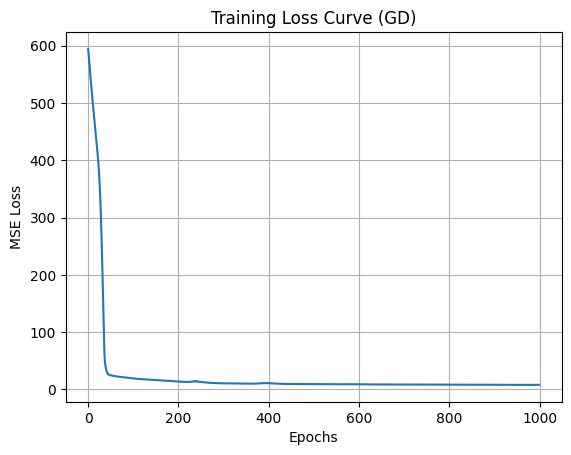

In [25]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve (GD)")
plt.grid()
plt.show()


In [26]:
y_pred, _ = forward(X_test, params)
test_mse = mse(y_test, y_pred)
print("Test MSE:", test_mse)


Test MSE: 13.301887089597342


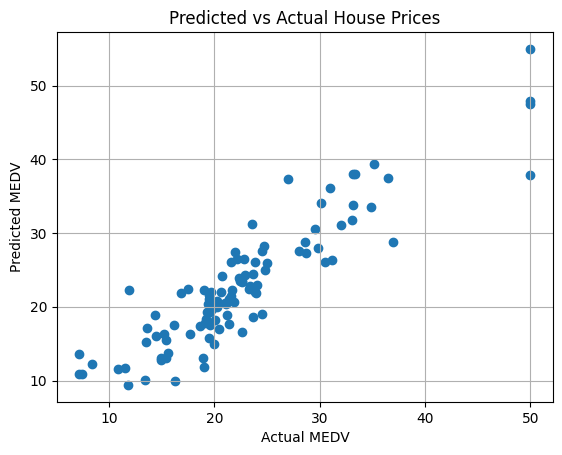

In [27]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Predicted vs Actual House Prices")
plt.grid()
plt.show()


Bonus

In [28]:
def train_momentum(X, y, lr=0.01, beta=0.9, epochs=1000):
    params = init_params()
    velocity = {k: np.zeros_like(v) for k, v in params.items()}
    losses = []

    for _ in range(epochs):
        y_hat, cache = forward(X, params)
        losses.append(mse(y, y_hat))

        grads = backward(y, y_hat, cache, params)

        for key in params:
            velocity[key] = beta * velocity[key] + lr * grads['d' + key]
            params[key] -= velocity[key]

    return params, losses


In [29]:
def train_adam(X, y, lr=0.001, beta1=0.9, beta2=0.999, eps=1e-8, epochs=1000):
    params = init_params()
    m = {k: np.zeros_like(v) for k, v in params.items()}
    v = {k: np.zeros_like(v) for k, v in params.items()}
    losses = []

    for t in range(1, epochs + 1):
        y_hat, cache = forward(X, params)
        losses.append(mse(y, y_hat))
        grads = backward(y, y_hat, cache, params)

        for key in params:
            g = grads['d' + key]
            m[key] = beta1 * m[key] + (1 - beta1) * g
            v[key] = beta2 * v[key] + (1 - beta2) * (g ** 2)

            m_hat = m[key] / (1 - beta1 ** t)
            v_hat = v[key] / (1 - beta2 ** t)

            params[key] -= lr * m_hat / (np.sqrt(v_hat) + eps)

    return params, losses


In [30]:
def mse_l2(y, y_hat, params, lam=0.01):
    reg = sum(np.sum(params[k]**2) for k in params if 'W' in k)
    return np.mean((y - y_hat)**2) + lam * reg


In [35]:
params_gd, loss_gd = train_gd(X_train, y_train, lr=0.01, epochs=1000)
params_mom, loss_mom = train_momentum(X_train, y_train, lr=0.01, epochs=1000)
params_adam, loss_adam = train_adam(X_train, y_train, lr=0.01, epochs=1000)

Epoch 0, Loss: 594.2590
Epoch 100, Loss: 87.7887
Epoch 200, Loss: 87.7530
Epoch 300, Loss: 87.7530
Epoch 400, Loss: 87.7530
Epoch 500, Loss: 87.7530
Epoch 600, Loss: 87.7530
Epoch 700, Loss: 87.7530
Epoch 800, Loss: 87.7530
Epoch 900, Loss: 87.7530


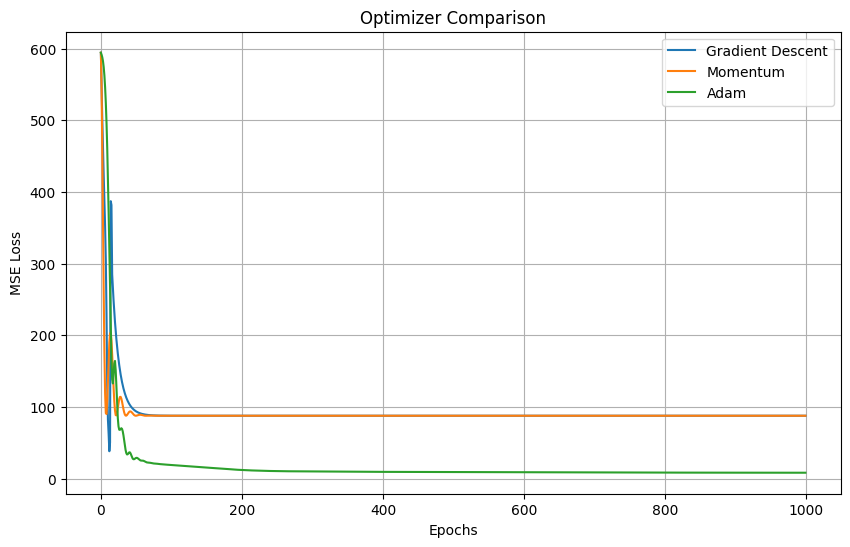

In [36]:
plt.figure(figsize=(10,6))
plt.plot(loss_gd, label="Gradient Descent")
plt.plot(loss_mom, label="Momentum")
plt.plot(loss_adam, label="Adam")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Optimizer Comparison")
plt.legend()
plt.grid()
plt.show()


In [64]:
def evaluate(params, X, y):
    y_pred, _ = forward(X, params)
    return mse(y, y_pred)

print("Test MSE (GD):", evaluate(params_gd, X_test, y_test))
print("Test MSE (Momentum):", evaluate(params_mom, X_test, y_test))
print("Test MSE (Adam):", evaluate(params_adam, X_test, y_test))


Test MSE (GD): 11.702918794956217
Test MSE (Momentum): 17.404349605397332
Test MSE (Adam): 33.6883992761109


Task 3

Linear

In [130]:
np.random.seed(42)

N = 500
X1 = np.random.randn(N, 2) + np.array([2, 2])
X2 = np.random.randn(N, 2) + np.array([-2, -2])
X3 = np.random.randn(N, 2) + np.array([2, -2])

X = np.vstack([X1, X2, X3])
y = np.array([0]*N + [1]*N + [2]*N)

In [132]:
def one_hot(y, num_classes):
    Y = np.zeros((len(y), num_classes))
    Y[np.arange(len(y)), y] = 1
    return Y

Y = one_hot(y, 3)


In [133]:
def split_data(X, Y, y):
    X_train, Y_train, X_val, Y_val, X_test, Y_test = [], [], [], [], [], []

    for c in np.unique(y):
        idx = np.where(y == c)[0]
        np.random.shuffle(idx)

        n = len(idx)
        t1, t2 = int(0.6*n), int(0.8*n)

        X_train.append(X[idx[:t1]])
        Y_train.append(Y[idx[:t1]])

        X_val.append(X[idx[t1:t2]])
        Y_val.append(Y[idx[t1:t2]])

        X_test.append(X[idx[t2:]])
        Y_test.append(Y[idx[t2:]])

    return (np.vstack(X_train), np.vstack(Y_train),
            np.vstack(X_val), np.vstack(Y_val),
            np.vstack(X_test), np.vstack(Y_test))

Xtr, Ytr, Xv, Yv, Xt, Yt = split_data(X, Y, y)


In [134]:
def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - np.tanh(z)**2

def softmax(z):
    expz = np.exp(z - np.max(z, axis=1, keepdims=True))
    return expz / np.sum(expz, axis=1, keepdims=True)


In [135]:
def init_params(input_dim, hidden_dim, output_dim):
    return {
        'W1': np.random.randn(input_dim, hidden_dim)*0.01,
        'b1': np.zeros((1, hidden_dim)),
        'W2': np.random.randn(hidden_dim, output_dim)*0.01,
        'b2': np.zeros((1, output_dim))
    }


In [136]:
def forward(X, params):
    Z1 = X @ params['W1'] + params['b1']
    A1 = tanh(Z1)
    Z2 = A1 @ params['W2'] + params['b2']
    A2 = softmax(Z2)
    cache = (X, Z1, A1)
    return A2, cache


In [137]:
def squared_error(Y, Yhat):
    return np.mean((Y - Yhat)**2)


In [138]:
def backward(Y, Yhat, cache, params):
    X, Z1, A1 = cache
    m = X.shape[0]

    dZ2 = (Yhat - Y) / m
    dW2 = A1.T @ dZ2
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = dZ2 @ params['W2'].T
    dZ1 = dA1 * tanh_derivative(Z1)
    dW1 = X.T @ dZ1
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    return {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}


In [139]:
def update(params, grads, lr):
    for k in params:
        params[k] -= lr * grads['d'+k]
    return params


In [140]:
def train(X, Y, hidden=10, lr=0.05, epochs=500):
    params = init_params(X.shape[1], hidden, Y.shape[1])
    losses = []

    for _ in range(epochs):
        Yhat, cache = forward(X, params)
        loss = squared_error(Y, Yhat)
        losses.append(loss)

        grads = backward(Y, Yhat, cache, params)
        params = update(params, grads, lr)

    return params, losses


In [141]:
params, losses = train(Xtr, Ytr, hidden=12)

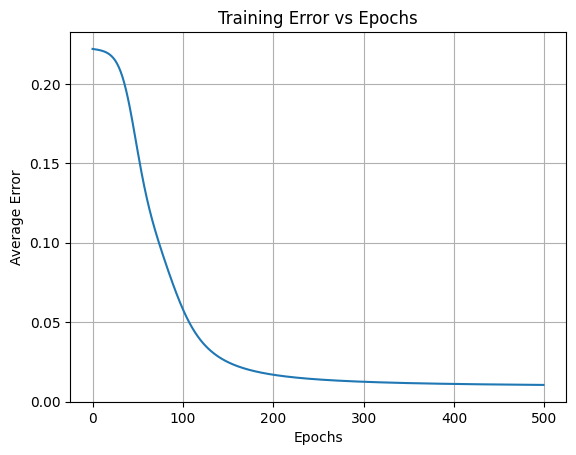

In [142]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Average Error")
plt.title("Training Error vs Epochs")
plt.grid()
plt.show()


In [143]:
Yv_hat, _ = forward(Xv, params)
y_val_pred = np.argmax(Yv_hat, axis=1)
y_val_true = np.argmax(Yv, axis=1)

print("Validation Accuracy:", accuracy_score(y_val_true, y_val_pred))
print(confusion_matrix(y_val_true, y_val_pred))


Validation Accuracy: 0.9733333333333334
[[ 98   0   2]
 [  0 100   0]
 [  1   5  94]]


In [144]:
Yt_hat, _ = forward(Xt, params)
y_test_pred = np.argmax(Yt_hat, axis=1)
y_test_true = np.argmax(Yt, axis=1)

print("Test Accuracy:", accuracy_score(y_test_true, y_test_pred))
print(confusion_matrix(y_test_true, y_test_pred))


Test Accuracy: 0.9633333333333334
[[ 99   0   1]
 [  0 100   0]
 [  5   5  90]]


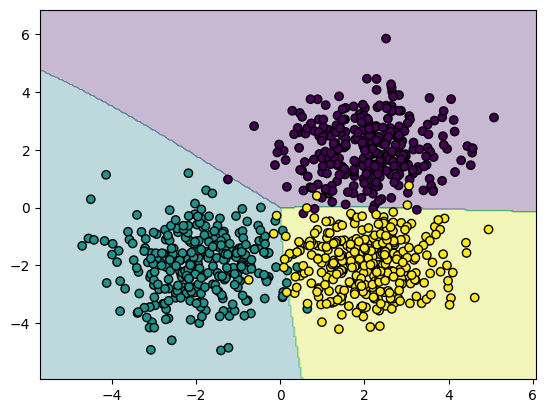

In [145]:
def plot_decision(X, params):
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min,x_max,300),
                         np.linspace(y_min,y_max,300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds,_ = forward(grid, params)
    Z = np.argmax(preds, axis=1).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(Xtr[:,0], Xtr[:,1], c=np.argmax(Ytr,1), edgecolor='k')
    plt.show()

plot_decision(Xtr, params)


Non Linear 

In [181]:
np.random.seed(42)

N = 500
K = 3
X = np.zeros((N*K, 2))
y = np.zeros(N*K, dtype=int)

for j in range(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j


In [182]:
Y = np.zeros((len(y), 3))
Y[np.arange(len(y)), y] = 1

In [183]:
Xtr, Ytr, Xv, Yv, Xt, Yt = split_data(X, Y, y)

In [184]:
params, losses = train(Xtr, Ytr, hidden=20, lr=0.05, epochs=800)

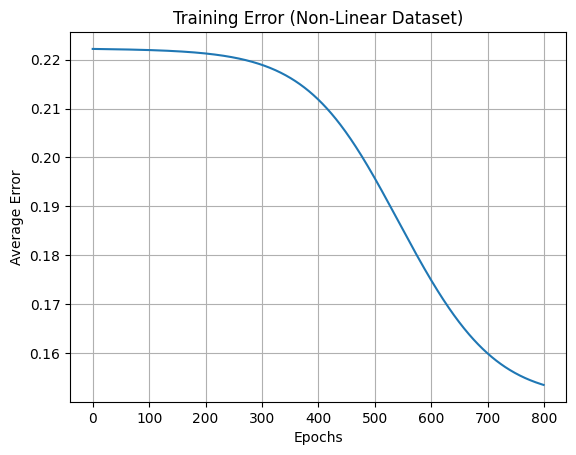

In [185]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Average Error")
plt.title("Training Error (Non-Linear Dataset)")
plt.grid()
plt.show()

In [186]:
Yv_hat, _ = forward(Xv, params)
y_val_pred = np.argmax(Yv_hat, axis=1)
y_val_true = np.argmax(Yv, axis=1)

print("Validation Accuracy:", accuracy_score(y_val_true, y_val_pred))
print(confusion_matrix(y_val_true, y_val_pred))

Validation Accuracy: 0.4533333333333333
[[40 43 17]
 [ 4 54 42]
 [54  4 42]]


In [187]:
Yt_hat, _ = forward(Xt, params)
y_test_pred = np.argmax(Yt_hat, axis=1)
y_test_true = np.argmax(Yt, axis=1)

print("Test Accuracy:", accuracy_score(y_test_true, y_test_pred))
print(confusion_matrix(y_test_true, y_test_pred))

Test Accuracy: 0.5333333333333333
[[43 39 18]
 [ 6 59 35]
 [36  6 58]]


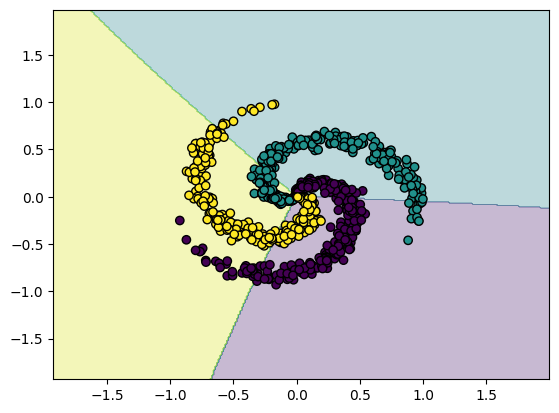

In [188]:
plot_decision(Xtr, params)

Task 4

In [39]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [40]:
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))
])

train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

selected_classes = [0, 1, 2, 3, 4]

def filter_dataset(dataset):
    X, y = [], []
    for data, label in dataset:
        if label in selected_classes:
            X.append(data)
            y.append(selected_classes.index(label))
    return torch.stack(X), torch.tensor(y)

X_train, y_train = filter_dataset(train_data)
X_test, y_test   = filter_dataset(test_data)


In [41]:
N = X_train.shape[0]
idx = torch.randperm(N)

train_size = int(0.8 * N)

train_idx = idx[:train_size]
val_idx   = idx[train_size:]

X_tr, y_tr = X_train[train_idx], y_train[train_idx]
X_val, y_val = X_train[val_idx], y_train[val_idx]


In [42]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [43]:
train_loader = torch.utils.data.DataLoader(
    CustomDataset(X_tr, y_tr), batch_size=1, shuffle=True
)

val_loader = torch.utils.data.DataLoader(
    CustomDataset(X_val, y_val), batch_size=1, shuffle=False
)

test_loader = torch.utils.data.DataLoader(
    CustomDataset(X_test, y_test), batch_size=1, shuffle=False
)


In [44]:
class FCNN(nn.Module):
    def __init__(self, layers):
        super().__init__()
        modules = []
        for i in range(len(layers)-2):
            modules.append(nn.Linear(layers[i], layers[i+1]))
            modules.append(nn.ReLU())
        modules.append(nn.Linear(layers[-2], layers[-1]))
        self.net = nn.Sequential(*modules)

    def forward(self, x):
        return self.net(x)


In [45]:
def init_weights(model):
    torch.manual_seed(0)
    for m in model.modules():
        if isinstance(m, nn.Linear):
            nn.init.xavier_uniform_(m.weight)
            nn.init.zeros_(m.bias)


In [46]:
def train(model, optimizer, criterion, loader):
    losses = []
    prev_loss = float('inf')

    for epoch in range(1000):
        total_loss = 0.0

        for x, y in loader:
            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(loader)
        losses.append(avg_loss)

        if abs(prev_loss - avg_loss) < 1e-4:
            break
        prev_loss = avg_loss

    return losses, epoch + 1


In [47]:
def evaluate(model, loader):
    y_true, y_pred = [], []

    with torch.no_grad():
        for x, y in loader:
            out = model(x)
            pred = torch.argmax(out, dim=1)
            y_pred.append(pred.item())
            y_true.append(y.item())

    return accuracy_score(y_true, y_pred), confusion_matrix(y_true, y_pred)


In [48]:
criterion = nn.CrossEntropyLoss()
lr = 0.001

optimizers = {
    "SGD": lambda p: optim.SGD(p, lr=lr),
    "BatchGD": lambda p: optim.SGD(p, lr=lr),
    "Momentum": lambda p: optim.SGD(p, lr=lr, momentum=0.9),
    "NAG": lambda p: optim.SGD(p, lr=lr, momentum=0.9, nesterov=True),
    "RMSProp": lambda p: optim.RMSprop(p, lr=lr, alpha=0.99, eps=1e-8),
    "Adam": lambda p: optim.Adam(p, lr=lr, betas=(0.9,0.999), eps=1e-8)
}


In [49]:
architecture = [784, 256, 128, 64, 5]
results = {}

for name, opt_fn in optimizers.items():
    model = FCNN(architecture)
    init_weights(model)

    optimizer = opt_fn(model.parameters())
    losses, epochs = train(model, optimizer, criterion, train_loader)

    train_acc, _ = evaluate(model, train_loader)
    val_acc, val_cm = evaluate(model, val_loader)

    results[name] = (losses, epochs, train_acc, val_acc, val_cm, model)


KeyboardInterrupt: 

In [202]:
plt.figure(figsize=(10,6))
for name in results:
    plt.plot(results[name][0], label=name)

plt.xlabel("Epochs")
plt.ylabel("Average Error")
plt.title("Optimizer Comparison on MNIST (5 Classes)")
plt.legend()
plt.grid()
plt.show()

Test Accuracy: 0.9891029383148473
Confusion Matrix:
 [[ 971    0    4    1    4]
 [   0 1129    5    1    0]
 [   6    3 1010    7    6]
 [   1    0    9  996    4]
 [   2    0    3    0  977]]


In [203]:
best = max(results, key=lambda x: results[x][3])
best_model = results[best][5]

test_acc, test_cm = evaluate(best_model, test_loader)

print("Best Optimizer:", best)
print("Test Accuracy:", test_acc)
print("Confusion Matrix:\n", test_cm)


Training Accuracy: 0.9997140055564635
Validation Accuracy: 0.9851307189542484
